### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [3]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, btl_distri, pop, carro_valla, 
digital_performance, residual, avg_recarga_residual, eventos_alto_bitacora, eventos_bajo_bitacora, eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Distributors - Traditional'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [4]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','btl_distri','pop','carro_valla','digital_performance','residual','avg_recarga_residual','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['residual']=df['residual'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')
df['avg_recarga_residual']=df['avg_recarga_residual'].astype('int')

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,btl_distri,pop,carro_valla,digital_performance,residual,avg_recarga_residual,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,40265,41687525,771166,0,61600000,2884220.0,0,365633245,0.21,4469,0.00,0.0,1.00
1,1.56,47910,57231920,95440163,79373000,88000000,8170000.0,0,422084086,0.26,3995,0.75,0.0,0.25
2,1.51,49599,116243171,194643334,0,70000000,0.0,0,429255030,0.22,4224,1.00,0.0,0.00
3,1.95,34012,117469351,366792554,0,70000000,34349575.0,0,426026002,0.30,4535,0.30,0.1,0.60
4,3.30,20358,131734088,320208915,0,2586790,34349575.0,0,372675824,0.21,5276,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

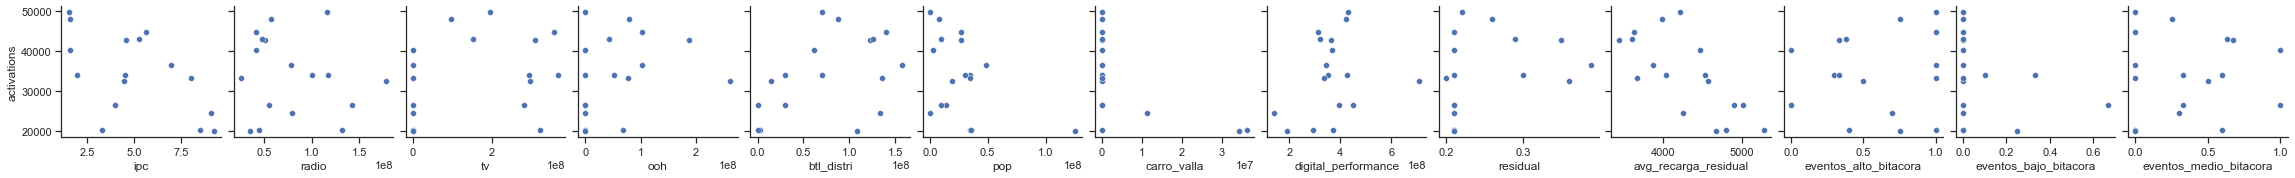

In [5]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','btl_distri','pop','carro_valla','digital_performance','residual','avg_recarga_residual','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

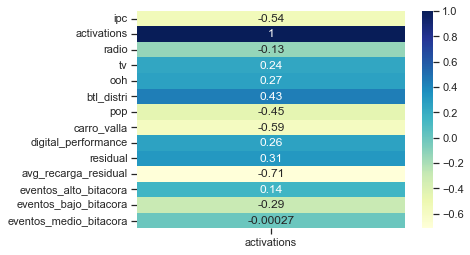

In [6]:
corrMatrix_1 = df.corr(method ='pearson')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled,columns=['ipc','activations','radio','tv','ooh','btl_distri','pop','carro_valla','digital_performance','residual','avg_recarga_residual','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,btl_distri,pop,carro_valla,digital_performance,residual,avg_recarga_residual,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,-1.311166,0.665501,-0.870890,-1.066161,-0.785244,-0.265711,-0.857172,-0.420897,-0.004035,-0.663094,0.329398,-1.531394,-0.452709,1.889798
1,-1.326841,1.472372,-0.508717,-0.418478,0.306437,0.228009,-0.669777,-0.420897,0.480201,0.153761,-0.567625,0.536961,-0.452709,-0.343281
2,-1.346435,1.650634,0.866201,0.260227,-0.785244,-0.108619,-0.959425,-0.420897,0.541714,-0.499723,-0.134253,1.226413,-0.452709,-1.087641
3,-1.174010,0.005544,0.894770,1.437996,-0.785244,-0.108619,0.258356,-0.420897,0.514015,0.807245,0.454300,-0.704052,0.117369,0.698822
4,-0.644979,-1.435532,1.227128,1.119291,-0.785244,-1.369347,0.258356,-0.420897,0.056376,-0.663094,1.856609,1.226413,-0.452709,-1.087641


### Omitir Variables 
De acuerdo a su correlación

In [8]:
del df['eventos_medio_bitacora']
del df['radio']
#del df['ipc']
del df['eventos_alto_bitacora']
#del df['ooh']
del df['pop']
del df['tv']
#del df['rotacion']
#del df['comisiones']
del df['digital_performance']
del df['eventos_bajo_bitacora']

### Regresión Lineal

In [9]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.8900031678095383
MAE:  0.2436918765261683
MSE:  0.10458214553004079

explained_variance: 0.8915476559985803




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              25.15
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                    8.18e-06
Time:                        13:38:47   Log-Likelihood:                         -1.2658
No. Observations:                  17   AIC:                                      14.53
Df Residuals:                      11   BIC:                                      19.53
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
ipc                     -0.8421      0.138     -6.120      0.000      -1.145      -0.539
ooh                      0.1381      0.146      0.946      0.365      -0.183       0.459
btl_distri               0.2369      0.189      1.256      0.235      -0.178       0.652
carro_valla              0.1744      0.122      1.428      0.181      -0.094       0.443
residual                -0.1122      0.127     -0.884      0.396      -0.392       0.167
avg_recarga_residual    -0.6625      0.181     -3.659      0.004      -1.061      -0.264
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.187
Skew:                           0.180   Prob(JB):                        0.911
Kurtosis:                       2.633   Cond. No.                         5.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'ooh', 'btl_distri', 'carro_valla', 'residual',
       'avg_recarga_residual'],
      dtype='object')

w = [[-0.83435443  0.18137722  0.37468556  0.04272501 -0.17966388 -0.56899192]], b = [-0.00901658]


In [11]:
model.params

ipc                    -0.842112
ooh                     0.138059
btl_distri              0.236873
carro_valla             0.174429
residual               -0.112214
avg_recarga_residual   -0.662468
dtype: float64

\begin{align}
\dot{activations} = \ -ipc(-3.09792336e+03) + ooh(2.36362536e-05) + btlDistri(6.63921241e-05) + carroValla(3.53512939e-05) - residual(2.78104862e+04) - avgRecargaResidual(1.02024530e+01) + 93431.01987797\\
\end{align}

### Modelo Regresión Activaciones con Recarga y con PAC

In [32]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Distributors - Traditional'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [33]:
df2 = pd.DataFrame(data2,columns=['activations', 'activations_w_topups', 'activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,40265,38311,17299
1,47910,46423,15822
2,49599,50060,26180
3,34012,32955,18802
4,20358,19105,10013


##### Recargas

In [34]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9773268230811532
MAE:  1452.3808847950704
MSE:  2462458.7011915715

explained_variance: 0.9794817230057027




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   0.994
Model:                              OLS   Adj. R-squared (uncentered):              0.994
Method:                   Least Squares   F-statistic:                              2726.
Date:                  Mon, 11 Jul 2022   Prob (F-statistic):                    2.65e-19
Time:                          14:58:30   Log-Likelihood:                         -158.20
No. Observations:                    17   AIC:                                      318.4
Df Residuals:                        16   BIC:                                      319.2
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.9858      0.019     52.212      0.000       0.946       1.026
==============================================================================
Omnibus:                        6.058   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                3.403
Skew:                           1.011   Prob(JB):                        0.182
Kurtosis:                       3.847   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[1.15537075]], b = [-6069.47954872]


\begin{align}
\dot{activations W topups} = \ activations(1.15537075) - 6069.47954872\\
\end{align}

##### PACS

In [36]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: -3.540247479635803
MAE:  2036.4368792164155
MSE:  8329695.799739762

explained_variance: -1.2798110832181009




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              321.3
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                    5.14e-12
Time:                        14:58:30   Log-Likelihood:                         -162.28
No. Observations:                  17   AIC:                                      326.6
Df Residuals:                      16   BIC:                                      327.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.4351      0.024     17.925      0.000       0.384       0.487
==============================================================================
Omnibus:                        0.269   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.443
Skew:                           0.143   Prob(JB):                        0.801
Kurtosis:                       2.263   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.32167459]], b = [3833.34541297]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(0.32167459) - 3833.34541297\\
\end{align}